# Machine Learning part 1 : Data Preprocessing 

In [32]:
#importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [92]:
#importing the Data Set
#Data has been taken from Machine Learning A-Z udemy
data = pd.read_csv('Data.csv')

In [34]:
#head function will display the top 5 rows in the Data Set
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [35]:
#tail function will display the last 5 rows in the Dataset
data.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [36]:
#displaying the whole Dataset
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [37]:
#differentiating between dependent and independent feature
'''
In the above Dataset we have 3 independent feature i.e. Contry , Age , Salary and one dependent feature i.e. Purchased
so we are taking independent features in a Variable called X and dependent feature in Y
'''
#This line below means that we are taking all the rows and cloumns except the last column
X = data.iloc[:,:-1].values

In [39]:
#printing the value X
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [41]:
#taking the dependent values in a variable named Y
#the code given below tells us that we have to take all the rows of column last one
Y = data.iloc[:,3].values

In [42]:
Y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# Missing Values

In [43]:
from sklearn.preprocessing import Imputer


In [44]:
imputer = Imputer(missing_values='NaN',strategy='mean')

In [46]:
#lower bound is included and upper bound is excluded
imputer.fit(X[:,1:3])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [47]:
X[:,1:3] = imputer.transform(X[:,1:3])

In [48]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Handling  Categorical values


* as we all know that machine learning models are based on mathematical equations so these categorical data may creates disturbances or a wrong model.
* we only wants numbers we dont want any charactar values so we have to encode them into numbers
* in our Dataset it contains two categoraical features 1 is Country and 2 is Purchased


In [55]:
# Encoding the Categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
X[:,0]=labelencoder_x.fit_transform(X[:,0])

In [60]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

### Now see that we have the encoded values of Country name
* France : 0
* Spain : 2
* Germany : 1

So now do you think that any problem can happen

I will you 10 seconds to think that what problem will arise here


# Dummy Variables

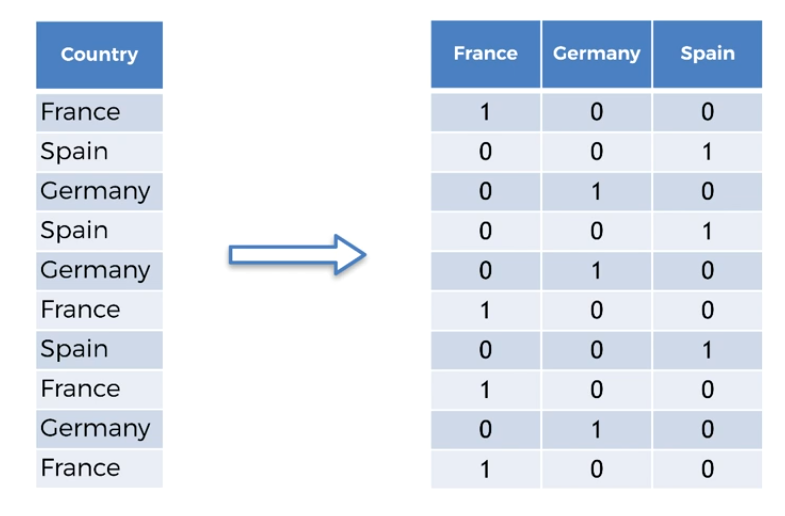

In [64]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()

In [67]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [71]:
# now do it for the dependent varibales too i.e. Purchased column 
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [72]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

# Splitting the Dataset into Training and testing phase

In [86]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [87]:
X_train

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04]])

In [88]:
X_test

array([[0.0e+00, 1.0e+00, 0.0e+00, 3.0e+01, 5.4e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.7e+01, 6.7e+04]])

In [89]:
Y_train


array([0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [90]:
Y_test

array([0, 1], dtype=int64)

# Topics we have covered
* Get the Dataset
* Importing the Libraries
* Missing Data we dont include this step in finalise preprocessed data
* Handling the Categorical Data via **Dummy Varibales** we dont include this step in finalise preprocessed data
* Splitting the Dataset into Training and testing phase
* Feature Scaling - to put all of the varibale in the same scale
* Final Preprocessed Data